In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteD534T4/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteD534T4/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteD534T4/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 68s 150ms/step - loss: 0.6165 - accuracy: 0.6342 - val_loss: 0.5889 - val_accuracy: 0.6987
Epoch 2/10
391/391 [==============================] - 59s 149ms/step - loss: 0.6186 - accuracy: 0.6838 - val_loss: 0.5528 - val_accuracy: 0.7582
Epoch 3/10
391/391 [==============================] - 59s 150ms/step - loss: 0.5035 - accuracy: 0.7541 - val_loss: 0.6879 - val_accuracy: 0.5651
Epoch 4/10
391/391 [==============================] - 59s 149ms/step - loss: 0.6602 - accuracy: 0.6341 - val_loss: 0.4713 - val_accuracy: 0.8016
Epoch 5/10
391/391 [==============================] - 59s 150ms/step - loss: 0.5160 - accuracy: 0.7527 - val_loss: 0.4632 - val_accuracy: 0.7991
Epoch 6/10
391/391 [==============================] - 59s 150ms/step - loss: 0.3132 - accuracy: 0.8737 - val_loss: 0.3903 - val_accuracy: 0.8394
Epoch 7/10
391/391 [==============================] - 59s 150ms/step - loss: 0.2384 - accuracy: 0.9079 - val_loss: 0.3807 - val_ac

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

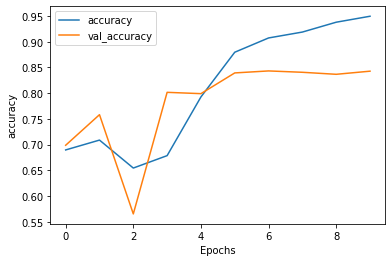

In [ ]:
plot_graphs(history, 'accuracy')

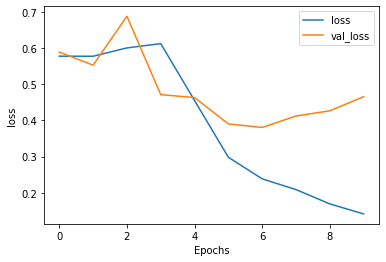

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
model_multi = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_multi.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_multi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model_multi.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 107s 263ms/step - loss: 0.6193 - accuracy: 0.6297 - val_loss: 0.5035 - val_accuracy: 0.7828
Epoch 2/10
391/391 [==============================] - 103s 262ms/step - loss: 0.4504 - accuracy: 0.8083 - val_loss: 0.4562 - val_accuracy: 0.7916
Epoch 3/10
391/391 [==============================] - 103s 261ms/step - loss: 0.3250 - accuracy: 0.8677 - val_loss: 0.3779 - val_accuracy: 0.8427
Epoch 4/10
391/391 [==============================] - 102s 261ms/step - loss: 0.2374 - accuracy: 0.9121 - val_loss: 0.4122 - val_accuracy: 0.8460
Epoch 5/10
391/391 [==============================] - 103s 263ms/step - loss: 0.1576 - accuracy: 0.9449 - val_loss: 0.3661 - val_accuracy: 0.8484
Epoch 6/10
391/391 [==============================] - 104s 264ms/step - loss: 0.1237 - accuracy: 0.9602 - val_loss: 0.4404 - val_accuracy: 0.8401
Epoch 7/10
391/391 [==============================] - 104s 265ms/step - loss: 0.0952 - accuracy: 0.9685 - val_loss: 0.4844 -

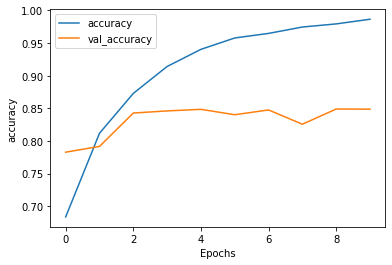

In [ ]:
plot_graphs(history, 'accuracy')

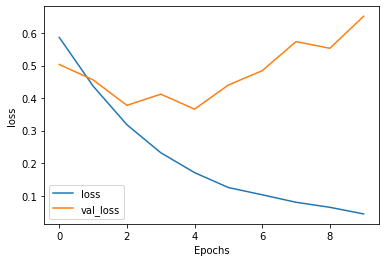

In [ ]:
plot_graphs(history, 'loss')